In [283]:
import pandas as pd 
import re
import seaborn as sns
import matplotlib.pyplot as plt
from PIL.ImageColor import colormap
from prompt_toolkit.eventloop.win32 import wait_for_handles
from streamlit import columns
from urlextract import URLExtract

In [10]:
f = open('D:\\VSCODE\\DA_PROJECT\\WhatsApp Chat with MLDA II.txt','r',encoding='utf-8')


In [11]:
raw_data = f.read()

In [12]:
print(raw_data)

1/29/24, 1:14 PM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
1/29/24, 11:54 AM - ~ Deepansh Vats created group "MLDA II"
1/29/24, 1:14 PM - You joined using this group's invite link
1/29/24, 1:14 PM - PRIYANSHU MAIT joined using this group's invite link
1/29/24, 1:16 PM - +91 88265 57807 joined using this group's invite link
1/29/24, 1:18 PM - +91 83680 58970: Wireless sensor ki lab nahi hogi software downloaded nahi hai
1/29/24, 1:21 PM - +91 89798 21371 joined using this group's invite link
1/29/24, 1:21 PM - Kartik MAIT joined using this group's invite link
1/29/24, 1:23 PM - PREET MAIT joined using this group's invite link
1/29/24, 1:24 PM - +91 83681 91413 joined using this group's invite link
1/29/24, 1:25 PM - 👑Mo^hit🕉🛕 joined using this group's invite link
1/29/24, 1:25 PM - +91 99588 20561 joined using this group's invite link
1/29/24, 1:25 PM - HARSHIT joined using this group's i

In [23]:
pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APM]{2}'

In [24]:
raw_chat = re.split(pattern,raw_data)[1:]

In [35]:
# Extracting the Cleaned Chat
pattern1 = r"(^\s*-+\s*|~\s*|'|\u202f)"
chat = [re.sub(pattern1, '', message) for message in raw_chat]
chat

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Deepansh Vats created group "MLDA II"\n',
 'You joined using this groups invite link\n',
 'PRIYANSHU MAIT joined using this groups invite link\n',
 '+91 88265 57807 joined using this groups invite link\n',
 '+91 83680 58970: Wireless sensor ki lab nahi hogi software downloaded nahi hai\n',
 '+91 89798 21371 joined using this groups invite link\n',
 'Kartik MAIT joined using this groups invite link\n',
 'PREET MAIT joined using this groups invite link\n',
 '+91 83681 91413 joined using this groups invite link\n',
 '👑Mo^hit🕉🛕 joined using this groups invite link\n',
 '+91 99588 20561 joined using this groups invite link\n',
 'HARSHIT joined using this groups invite link\n',
 'ASHUTOSH joined using this groups invite link\n',
 '+91 96500 58759 joined using this groups invite link\n',
 '+91 95608 64048 joined using this groups invite link\n',
 

In [36]:
dates = re.findall(pattern,raw_data)

In [37]:
dates

['1/29/24, 1:14\u202fPM',
 '1/29/24, 11:54\u202fAM',
 '1/29/24, 1:14\u202fPM',
 '1/29/24, 1:14\u202fPM',
 '1/29/24, 1:16\u202fPM',
 '1/29/24, 1:18\u202fPM',
 '1/29/24, 1:21\u202fPM',
 '1/29/24, 1:21\u202fPM',
 '1/29/24, 1:23\u202fPM',
 '1/29/24, 1:24\u202fPM',
 '1/29/24, 1:25\u202fPM',
 '1/29/24, 1:25\u202fPM',
 '1/29/24, 1:25\u202fPM',
 '1/29/24, 1:25\u202fPM',
 '1/29/24, 1:28\u202fPM',
 '1/29/24, 1:28\u202fPM',
 '1/29/24, 1:31\u202fPM',
 '1/29/24, 1:31\u202fPM',
 '1/29/24, 1:33\u202fPM',
 '1/29/24, 1:36\u202fPM',
 '1/29/24, 1:36\u202fPM',
 '1/29/24, 1:38\u202fPM',
 '1/29/24, 1:38\u202fPM',
 '1/29/24, 1:40\u202fPM',
 '1/29/24, 1:40\u202fPM',
 '1/29/24, 1:40\u202fPM',
 '1/29/24, 1:43\u202fPM',
 '1/29/24, 1:47\u202fPM',
 '1/29/24, 1:48\u202fPM',
 '1/29/24, 1:51\u202fPM',
 '1/29/24, 1:51\u202fPM',
 '1/29/24, 1:53\u202fPM',
 '1/29/24, 1:54\u202fPM',
 '1/29/24, 2:18\u202fPM',
 '1/29/24, 2:22\u202fPM',
 '1/29/24, 2:29\u202fPM',
 '1/29/24, 2:49\u202fPM',
 '1/29/24, 2:59\u202fPM',
 '1/29/24, 

In [66]:
# Creating A DataFrame 
raw_df = pd.DataFrame({'User_Message' : chat, 'Message_Date':dates})
# Insert a space before 'AM' or 'PM' and remove the narrow no-break space (\u202f)
raw_df['Message_Date'] = raw_df['Message_Date'].str.replace(r'(\d)(AM|PM)', r'\1 \2', regex=True).str.replace('\u202f', '')

# Parse 'Message_Date' with the corrected format
raw_df['Message_Date'] = pd.to_datetime(raw_df['Message_Date'], format='mixed')

In [67]:
raw_df.sample(10)

,User_Message,Message_Date
1239,+91 88511 33149: Kal printed le chlte hai \nAg...,2024-11-04 13:01:00
1335,Manasvi MAIT: Kal hi hai kya iot ka viva?\n,2024-11-07 17:02:00
747,Manasvi MAIT: This message was deleted\n,2024-05-05 21:42:00
292,+91 92892 04777: Ok\n,2024-03-07 11:16:00
645,+91 97177 18934: Jiski lab\n,2024-04-28 21:59:00
843,+91 98686 49386: A wale chle jao ✍️ ke liye\n,2024-05-21 09:04:00
555,+91 97739 35395: <Media omitted>\n,2024-03-28 13:26:00
610,Your security code with अमन राणा changed. Tap ...,2024-04-19 16:13:00
553,+91 83681 91413: Manshul\ncall asap\n,2024-03-27 14:51:00
196,RITIK MAIT: <Media omitted>\n,2024-02-20 14:17:00


In [68]:
# Seprate users and messages 
Users = []
message_chat = []

for mess in raw_df['User_Message']:
    entry = re.split(r'([\w\W]+?):\s',mess)
    if entry[1:]: # user name
        Users.append(entry[1])
        message_chat.append(entry[2])
    else:
        Users.append('Group_notification')
        message_chat.append(entry[0])
raw_df['Users'] = Users
raw_df['message_chat'] = message_chat
raw_df.drop(columns=['User_Message'],inplace=True)

raw_df.head(10)

,Message_Date,Users,message_chat
0,2024-01-29 13:14:00,Group_notification,Messages and calls are end-to-end encrypted. N...
1,2024-01-29 11:54:00,Group_notification,"Deepansh Vats created group ""MLDA II""\n"
2,2024-01-29 13:14:00,Group_notification,You joined using this groups invite link\n
3,2024-01-29 13:14:00,Group_notification,PRIYANSHU MAIT joined using this groups invite...
4,2024-01-29 13:16:00,Group_notification,+91 88265 57807 joined using this groups invit...
5,2024-01-29 13:18:00,+91 83680 58970,Wireless sensor ki lab nahi hogi software down...
6,2024-01-29 13:21:00,Group_notification,+91 89798 21371 joined using this groups invit...
7,2024-01-29 13:21:00,Group_notification,Kartik MAIT joined using this groups invite li...
8,2024-01-29 13:23:00,Group_notification,PREET MAIT joined using this groups invite link\n
9,2024-01-29 13:24:00,Group_notification,+91 83681 91413 joined using this groups invit...


In [211]:
# Creating Columns [Year, Month, Day, Hour, Minute]
raw_df['Year'] = raw_df['Message_Date'].dt.year
raw_df["Month_num"] = raw_df['Message_Date'].dt.month
raw_df['Month'] = raw_df['Message_Date'].dt.month_name()
raw_df['Day'] = raw_df['Message_Date'].dt.day
raw_df['Hour'] = raw_df['Message_Date'].dt.hour
raw_df['Minute'] = raw_df['Message_Date'].dt.minute


In [213]:
raw_df

,Message_Date,Users,message_chat,Year,Month,Day,Hour,Minute,Month_num
0,2024-01-29 13:14:00,Group_notification,Messages and calls are end-to-end encrypted. N...,2024,January,29,13,14,1
1,2024-01-29 11:54:00,Group_notification,"Deepansh Vats created group ""MLDA II""\n",2024,January,29,11,54,1
2,2024-01-29 13:14:00,Group_notification,You joined using this groups invite link\n,2024,January,29,13,14,1
3,2024-01-29 13:14:00,Group_notification,PRIYANSHU MAIT joined using this groups invite...,2024,January,29,13,14,1
4,2024-01-29 13:16:00,Group_notification,+91 88265 57807 joined using this groups invit...,2024,January,29,13,16,1
...,...,...,...,...,...,...,...,...,...
1336,2024-11-07 17:02:00,Manasvi MAIT,Ya next week?\n,2024,November,7,17,2,11
1337,2024-11-07 17:03:00,+91 83680 58970,Monday ko aayega prof\n,2024,November,7,17,3,11
1338,2024-11-07 17:04:00,+91 99585 71659,Monday ka hii bolo usse lene ko\n,2024,November,7,17,4,11
1339,2024-11-07 17:04:00,+91 99585 71659,Dubara thodi aayege special uske liye\n,2024,November,7,17,4,11


In [214]:
whatsapp_chat_df = raw_df

In [215]:
whatsapp_chat_df

,Message_Date,Users,message_chat,Year,Month,Day,Hour,Minute,Month_num
0,2024-01-29 13:14:00,Group_notification,Messages and calls are end-to-end encrypted. N...,2024,January,29,13,14,1
1,2024-01-29 11:54:00,Group_notification,"Deepansh Vats created group ""MLDA II""\n",2024,January,29,11,54,1
2,2024-01-29 13:14:00,Group_notification,You joined using this groups invite link\n,2024,January,29,13,14,1
3,2024-01-29 13:14:00,Group_notification,PRIYANSHU MAIT joined using this groups invite...,2024,January,29,13,14,1
4,2024-01-29 13:16:00,Group_notification,+91 88265 57807 joined using this groups invit...,2024,January,29,13,16,1
...,...,...,...,...,...,...,...,...,...
1336,2024-11-07 17:02:00,Manasvi MAIT,Ya next week?\n,2024,November,7,17,2,11
1337,2024-11-07 17:03:00,+91 83680 58970,Monday ko aayega prof\n,2024,November,7,17,3,11
1338,2024-11-07 17:04:00,+91 99585 71659,Monday ka hii bolo usse lene ko\n,2024,November,7,17,4,11
1339,2024-11-07 17:04:00,+91 99585 71659,Dubara thodi aayege special uske liye\n,2024,November,7,17,4,11


In [216]:
# Stats For Selected User
whatsapp_chat_df[whatsapp_chat_df['Users'] == 'SURYANSHU']

,Message_Date,Users,message_chat,Year,Month,Day,Hour,Minute,Month_num
151,2024-02-09 21:58:00,SURYANSHU,+1\n,2024,February,9,21,58,2
640,2024-04-28 20:36:00,SURYANSHU,Mere pr h\n,2024,April,28,20,36,4
656,2024-04-29 09:43:00,SURYANSHU,Next week krlo fir\n,2024,April,29,9,43,4
671,2024-04-29 09:48:00,SURYANSHU,Mene check Kiya ....mere pr nhi h Aman ki file\n,2024,April,29,9,48,4
729,2024-05-04 21:56:00,SURYANSHU,<Media omitted>\n,2024,May,4,21,56,5
908,2024-07-13 12:22:00,SURYANSHU,<Media omitted>\n,2024,July,13,12,22,7
909,2024-07-13 12:22:00,SURYANSHU,<Media omitted>\n,2024,July,13,12,22,7
910,2024-07-13 12:23:00,SURYANSHU,<Media omitted>\n,2024,July,13,12,23,7
950,2024-07-13 15:02:00,SURYANSHU,Code wise Subject\n,2024,July,13,15,2,7


In [217]:
# Total words
words=[]
for m in whatsapp_chat_df['message_chat'].values:
    words.extend(m.split())
len(words)



8946

In [218]:
# URL Extraction
# example
from urlextract import URLExtract
extractor = URLExtract()
urls = extractor.find_urls("Let's have URL stackedflow.com as an example google.com, http://facbook.com, ftp://url.in")

In [219]:
urls

['stackedflow.com', 'google.com', 'http://facbook.com', 'ftp://url.in']

In [220]:
urls_list = []
for m in whatsapp_chat_df['message_chat']:
    urls_list.extend(extractor.find_urls(m))
# len(urls_list)
# urls_list

In [221]:
x = whatsapp_chat_df['Users'].value_counts().head(10)

In [222]:
import matplotlib.pyplot as plt 

In [223]:
name = x.index
count = x.values

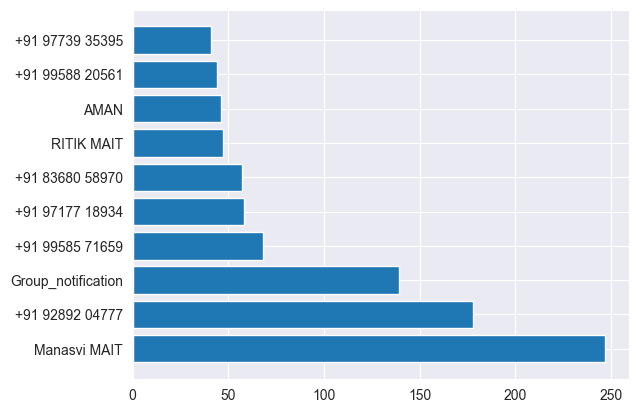

In [224]:
plt.barh(name,count)
plt.show()

In [225]:
# Users message count and percentage :
Users_message_percentage = round((whatsapp_chat_df['Users'].value_counts()/ whatsapp_chat_df.shape[0])*100,2).reset_index().rename(columns={'Users':'Users', 'count': 'Percentage'}).set_index('Users')
Users_message_percentage

,Percentage
Users,
Manasvi MAIT,18.42
+91 92892 04777,13.27
Group_notification,10.37
+91 99585 71659,5.07
+91 97177 18934,4.33
+91 83680 58970,4.25
RITIK MAIT,3.50
AMAN,3.43
+91 99588 20561,3.28


In [226]:
words = []
for i in whatsapp_chat_df['message_chat']:
    words.extend(i.split())
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 'Deepansh',
 'Vats',
 'created',
 'group',
 '"MLDA',
 'II"',
 'You',
 'joined',
 'using',
 'this',
 'groups',
 'invite',
 'link',
 'PRIYANSHU',
 'MAIT',
 'joined',
 'using',
 'this',
 'groups',
 'invite',
 'link',
 '+91',
 '88265',
 '57807',
 'joined',
 'using',
 'this',
 'groups',
 'invite',
 'link',
 'Wireless',
 'sensor',
 'ki',
 'lab',
 'nahi',
 'hogi',
 'software',
 'downloaded',
 'nahi',
 'hai',
 '+91',
 '89798',
 '21371',
 'joined',
 'using',
 'this',
 'groups',
 'invite',
 'link',
 'Kartik',
 'MAIT',
 'joined',
 'using',
 'this',
 'groups',
 'invite',
 'link',
 'PREET',
 'MAIT',
 'joined',
 'using',
 'this',
 'groups',
 'invite',
 'link',
 '+91',
 '83681',
 '91413',
 'joined',
 'using',
 'this',
 'groups',
 'invite',
 'link',
 '👑Mo^hit🕉🛕',
 

In [227]:
temp = whatsapp_chat_df[whatsapp_chat_df['Users'] != 'Group_notification']

In [228]:
temp

,Message_Date,Users,message_chat,Year,Month,Day,Hour,Minute,Month_num
5,2024-01-29 13:18:00,+91 83680 58970,Wireless sensor ki lab nahi hogi software down...,2024,January,29,13,18,1
20,2024-01-29 13:36:00,PRIYANSHU MAIT,<Media omitted>\n,2024,January,29,13,36,1
23,2024-01-29 13:40:00,+91 99588 20561,This message was deleted\n,2024,January,29,13,40,1
25,2024-01-29 13:40:00,+91 99588 20561,Lab loge?\n,2024,January,29,13,40,1
46,2024-01-30 09:35:00,PRIYANSHU MAIT,come for digital image class at 9.45 am\nin 40...,2024,January,30,9,35,1
...,...,...,...,...,...,...,...,...,...
1336,2024-11-07 17:02:00,Manasvi MAIT,Ya next week?\n,2024,November,7,17,2,11
1337,2024-11-07 17:03:00,+91 83680 58970,Monday ko aayega prof\n,2024,November,7,17,3,11
1338,2024-11-07 17:04:00,+91 99585 71659,Monday ka hii bolo usse lene ko\n,2024,November,7,17,4,11
1339,2024-11-07 17:04:00,+91 99585 71659,Dubara thodi aayege special uske liye\n,2024,November,7,17,4,11


In [229]:
temp = temp[temp['message_chat']!= '<Media omitted>\n']

In [230]:
temp

,Message_Date,Users,message_chat,Year,Month,Day,Hour,Minute,Month_num
5,2024-01-29 13:18:00,+91 83680 58970,Wireless sensor ki lab nahi hogi software down...,2024,January,29,13,18,1
23,2024-01-29 13:40:00,+91 99588 20561,This message was deleted\n,2024,January,29,13,40,1
25,2024-01-29 13:40:00,+91 99588 20561,Lab loge?\n,2024,January,29,13,40,1
46,2024-01-30 09:35:00,PRIYANSHU MAIT,come for digital image class at 9.45 am\nin 40...,2024,January,30,9,35,1
59,2024-01-31 09:41:00,+91 92892 04777,This message was deleted\n,2024,January,31,9,41,1
...,...,...,...,...,...,...,...,...,...
1336,2024-11-07 17:02:00,Manasvi MAIT,Ya next week?\n,2024,November,7,17,2,11
1337,2024-11-07 17:03:00,+91 83680 58970,Monday ko aayega prof\n,2024,November,7,17,3,11
1338,2024-11-07 17:04:00,+91 99585 71659,Monday ka hii bolo usse lene ko\n,2024,November,7,17,4,11
1339,2024-11-07 17:04:00,+91 99585 71659,Dubara thodi aayege special uske liye\n,2024,November,7,17,4,11


In [231]:
temp['message_chat']

5       Wireless sensor ki lab nahi hogi software down...
23                             This message was deleted\n
25                                            Lab loge?\n
46      come for digital image class at 9.45 am\nin 40...
59                             This message was deleted\n
                              ...                        
1336                                      Ya next week?\n
1337                              Monday ko aayega prof\n
1338                    Monday ka hii bolo usse lene ko\n
1339              Dubara thodi aayege special uske liye\n
1340                   Jiske paas number ho baat kar le\n
Name: message_chat, Length: 882, dtype: object

In [232]:
f =open('D:\\VSCODE\\DA_PROJECT\\stop_hinglish.txt','r')
stopWord = f.read()

In [233]:
stopWord

".\n..\n...\n?\n-\n--\n1\n2\n3\n4\n5\n6\n7\n8\n9\n0\na\naadi\naaj\naap\naapne\naata\naati\naaya\naaye\nab\nabbe\nabbey\nabe\nabhi\nable\nabout\nabove\naccha\naccording\naccordingly\nacha\nachcha\nacross\nactually\nafter\nafterwards\nagain\nagainst\nagar\nain\naint\nain't\naisa\naise\naisi\nalag\nall\nallow\nallows\nalmost\nalone\nalong\nalready\nalso\nalthough\nalways\nam\namong\namongst\nan\nand\nandar\nanother\nany\nanybody\nanyhow\nanyone\nanything\nanyway\nanyways\nanywhere\nap\napan\napart\napna\napnaa\napne\napni\nappear\nare\naren\narent\naren't\naround\narre\nas\naside\nask\nasking\nat\naur\navum\naya\naye\nbaad\nbaar\nbad\nbahut\nbana\nbanae\nbanai\nbanao\nbanaya\nbanaye\nbanayi\nbanda\nbande\nbandi\nbane\nbani\nbas\nbata\nbatao\nbc\nbe\nbecame\nbecause\nbecome\nbecomes\nbecoming\nbeen\nbefore\nbeforehand\nbehind\nbeing\nbelow\nbeside\nbesides\nbest\nbetter\nbetween\nbeyond\nbhai\nbheetar\nbhi\nbhitar\nbht\nbilkul\nbohot\nbol\nbola\nbole\nboli\nbolo\nbolta\nbolte\nbolti\nboth\

In [234]:
words = []
for m in temp['message_chat']:
   for i in m.lower().split():
       if i not in stopWord:
           words.append(i)

In [235]:
words

['wireless',
 'sensor',
 'lab',
 'software',
 'downloaded',
 'message',
 'deleted',
 'lab',
 'loge?',
 'digital',
 'image',
 'class',
 '9.45',
 '401b',
 'message',
 'deleted',
 'bkl',
 'grp',
 'admin',
 'installation',
 'sisco',
 'packet',
 'ns2',
 'exp2',
 'wireless',
 'sensor',
 'network',
 '<this',
 'message',
 'edited>',
 'dip',
 'class',
 '423',
 'lab',
 'jaldi',
 'aajao',
 'sb',
 'class',
 'start',
 '*digital',
 'image',
 'processing',
 '-308-',
 'syllabus',
 'text',
 'books*',
 'https://drive.google.com/drive/folders/17tyysaqzpibfiflls4focxxbitislido?usp=sharing',
 'class',
 'baris',
 'islye',
 '2nd',
 'lec',
 'ml',
 'message',
 'deleted',
 '*new',
 'class',
 'rooms',
 'dip-ece308',
 'theory',
 'classes*',
 'mlda',
 'batch',
 '1.',
 'monday',
 '12:00-12:50',
 '401b',
 '2.',
 'tuesday',
 '10:20-11:10',
 '401b',
 '3.',
 'thursday',
 '9:30-10:20',
 '423',
 'pls.',
 'share',
 'confirm.',
 'ml',
 'syllabus',
 '☝🏻',
 'message',
 'deleted',
 'message',
 'deleted',
 'message',
 'deleted

In [236]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(25)).rename(columns={0:'Typed', 1:'counts'})


,Typed,counts
0,set,81
1,message,66
2,deleted,49
3,$ns,42
4,#,37
5,class,26
6,\,26
7,;#,24
8,print,23
9,file,19


In [237]:
# Emojis
import emoji

emojis = []
for m in whatsapp_chat_df['message_chat']:
    emojis.extend([c for c in m if emoji.is_emoji(c)])  # Check if each character is an emoji


In [238]:
most_common_emojis = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

In [239]:
most_common_emojis

,0,1
0,🏻,19
1,🤣,14
2,🔥,9
3,🫡,8
4,🙏,8
...,...,...
58,💻,1
59,✍,1
60,😀,1
61,🤟,1


In [240]:
whatsapp_chat_df

,Message_Date,Users,message_chat,Year,Month,Day,Hour,Minute,Month_num
0,2024-01-29 13:14:00,Group_notification,Messages and calls are end-to-end encrypted. N...,2024,January,29,13,14,1
1,2024-01-29 11:54:00,Group_notification,"Deepansh Vats created group ""MLDA II""\n",2024,January,29,11,54,1
2,2024-01-29 13:14:00,Group_notification,You joined using this groups invite link\n,2024,January,29,13,14,1
3,2024-01-29 13:14:00,Group_notification,PRIYANSHU MAIT joined using this groups invite...,2024,January,29,13,14,1
4,2024-01-29 13:16:00,Group_notification,+91 88265 57807 joined using this groups invit...,2024,January,29,13,16,1
...,...,...,...,...,...,...,...,...,...
1336,2024-11-07 17:02:00,Manasvi MAIT,Ya next week?\n,2024,November,7,17,2,11
1337,2024-11-07 17:03:00,+91 83680 58970,Monday ko aayega prof\n,2024,November,7,17,3,11
1338,2024-11-07 17:04:00,+91 99585 71659,Monday ka hii bolo usse lene ko\n,2024,November,7,17,4,11
1339,2024-11-07 17:04:00,+91 99585 71659,Dubara thodi aayege special uske liye\n,2024,November,7,17,4,11


In [241]:
whatsapp_chat_df['Month_num']  = whatsapp_chat_df['Message_Date'].dt.month

In [242]:
whatsapp_chat_df

,Message_Date,Users,message_chat,Year,Month,Day,Hour,Minute,Month_num
0,2024-01-29 13:14:00,Group_notification,Messages and calls are end-to-end encrypted. N...,2024,January,29,13,14,1
1,2024-01-29 11:54:00,Group_notification,"Deepansh Vats created group ""MLDA II""\n",2024,January,29,11,54,1
2,2024-01-29 13:14:00,Group_notification,You joined using this groups invite link\n,2024,January,29,13,14,1
3,2024-01-29 13:14:00,Group_notification,PRIYANSHU MAIT joined using this groups invite...,2024,January,29,13,14,1
4,2024-01-29 13:16:00,Group_notification,+91 88265 57807 joined using this groups invit...,2024,January,29,13,16,1
...,...,...,...,...,...,...,...,...,...
1336,2024-11-07 17:02:00,Manasvi MAIT,Ya next week?\n,2024,November,7,17,2,11
1337,2024-11-07 17:03:00,+91 83680 58970,Monday ko aayega prof\n,2024,November,7,17,3,11
1338,2024-11-07 17:04:00,+91 99585 71659,Monday ka hii bolo usse lene ko\n,2024,November,7,17,4,11
1339,2024-11-07 17:04:00,+91 99585 71659,Dubara thodi aayege special uske liye\n,2024,November,7,17,4,11


In [243]:
timeline = whatsapp_chat_df.groupby(['Year','Month_num','Month']).count()['message_chat'].reset_index()

In [244]:
timeline

,Year,Month_num,Month,message_chat
0,2024,1,January,67
1,2024,2,February,191
2,2024,3,March,305
3,2024,4,April,149
4,2024,5,May,136
5,2024,6,June,57
6,2024,7,July,48
7,2024,8,August,15
8,2024,9,September,74
9,2024,10,October,132


In [245]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['Month'][i] + "-" + str(timeline['Year'][i]))

In [246]:
time

['January-2024',
 'February-2024',
 'March-2024',
 'April-2024',
 'May-2024',
 'June-2024',
 'July-2024',
 'August-2024',
 'September-2024',
 'October-2024',
 'November-2024']

In [247]:
timeline['Time']   = time

In [248]:
timeline

,Year,Month_num,Month,message_chat,Time
0,2024,1,January,67,January-2024
1,2024,2,February,191,February-2024
2,2024,3,March,305,March-2024
3,2024,4,April,149,April-2024
4,2024,5,May,136,May-2024
5,2024,6,June,57,June-2024
6,2024,7,July,48,July-2024
7,2024,8,August,15,August-2024
8,2024,9,September,74,September-2024
9,2024,10,October,132,October-2024


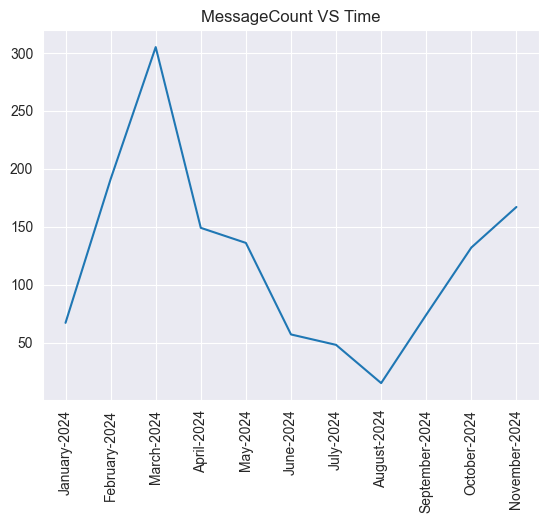

In [249]:
plt.plot(timeline['Time'], timeline['message_chat'])
plt.xticks(rotation='vertical')
plt.title('MessageCount VS Time')
plt.show()

In [250]:
whatsapp_chat_df['Date_only'] = whatsapp_chat_df['Message_Date'].dt.date

In [256]:
daily_timeline = whatsapp_chat_df.groupby(['Date_only'])['message_chat'].count().reset_index()

In [257]:
daily_timeline

,Date_only,message_chat
0,2024-01-29,45
1,2024-01-30,11
2,2024-01-31,11
3,2024-02-01,14
4,2024-02-02,20
...,...,...
149,2024-11-03,2
150,2024-11-04,51
151,2024-11-05,47
152,2024-11-06,10


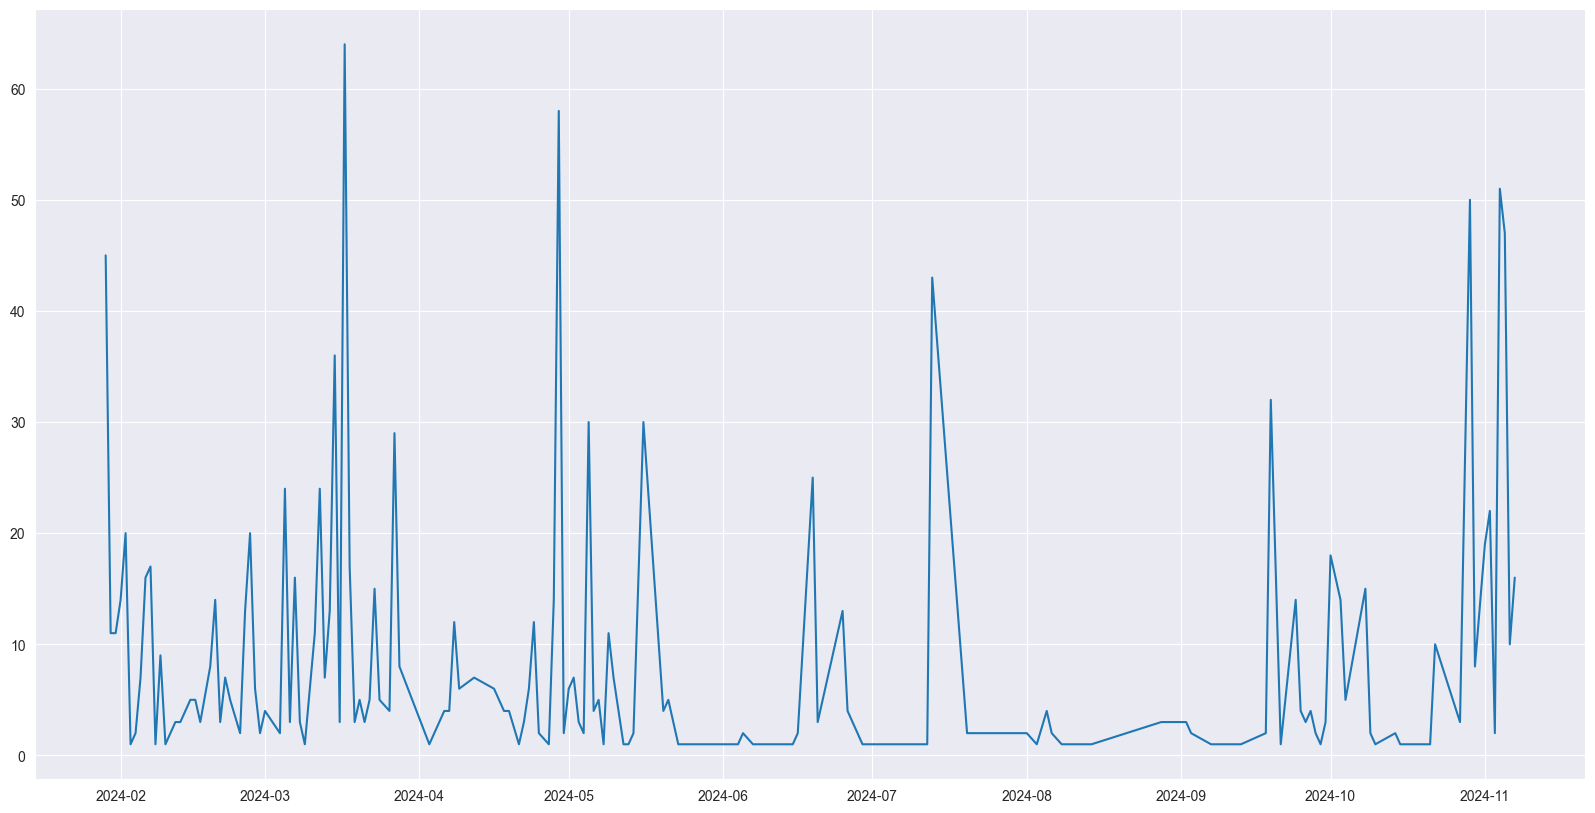

In [260]:
plt.figure(figsize=(20,10))
plt.plot(daily_timeline['Date_only'],daily_timeline['message_chat'])

In [265]:
whatsapp_chat_df['Day'] = whatsapp_chat_df['Message_Date'].dt.day_name()

In [268]:
whatsapp_chat_df['Day'].value_counts().set

Day
Tuesday      325
Monday       252
Thursday     199
Wednesday    184
Friday       142
Sunday       134
Saturday     105
Name: count, dtype: int64

In [269]:
whatsapp_chat_df.head()

,Message_Date,Users,message_chat,Year,Month,Day,Hour,Minute,Month_num,Date_only,Date
0,2024-01-29 13:14:00,Group_notification,Messages and calls are end-to-end encrypted. N...,2024,January,Monday,13,14,1,2024-01-29,2024-01-29
1,2024-01-29 11:54:00,Group_notification,"Deepansh Vats created group ""MLDA II""\n",2024,January,Monday,11,54,1,2024-01-29,2024-01-29
2,2024-01-29 13:14:00,Group_notification,You joined using this groups invite link\n,2024,January,Monday,13,14,1,2024-01-29,2024-01-29
3,2024-01-29 13:14:00,Group_notification,PRIYANSHU MAIT joined using this groups invite...,2024,January,Monday,13,14,1,2024-01-29,2024-01-29
4,2024-01-29 13:16:00,Group_notification,+91 88265 57807 joined using this groups invit...,2024,January,Monday,13,16,1,2024-01-29,2024-01-29


In [272]:
period = []
for hour in whatsapp_chat_df[['Day','Hour',]]['Hour']:
    if hour == 23 :
        period.append(str(hour) + '-' + str('00'))
    elif hour == 0:
        period.append(str('00') + '-' + str(hour + 1))
    else:
        period.append(str(hour) + '-' + str(hour + 1))

In [273]:
whatsapp_chat_df['period'] = period
whatsapp_chat_df


,Message_Date,Users,message_chat,Year,Month,Day,Hour,Minute,Month_num,Date_only,Date,period
0,2024-01-29 13:14:00,Group_notification,Messages and calls are end-to-end encrypted. N...,2024,January,Monday,13,14,1,2024-01-29,2024-01-29,13-14
1,2024-01-29 11:54:00,Group_notification,"Deepansh Vats created group ""MLDA II""\n",2024,January,Monday,11,54,1,2024-01-29,2024-01-29,11-12
2,2024-01-29 13:14:00,Group_notification,You joined using this groups invite link\n,2024,January,Monday,13,14,1,2024-01-29,2024-01-29,13-14
3,2024-01-29 13:14:00,Group_notification,PRIYANSHU MAIT joined using this groups invite...,2024,January,Monday,13,14,1,2024-01-29,2024-01-29,13-14
4,2024-01-29 13:16:00,Group_notification,+91 88265 57807 joined using this groups invit...,2024,January,Monday,13,16,1,2024-01-29,2024-01-29,13-14
...,...,...,...,...,...,...,...,...,...,...,...,...
1336,2024-11-07 17:02:00,Manasvi MAIT,Ya next week?\n,2024,November,Thursday,17,2,11,2024-11-07,2024-11-07,17-18
1337,2024-11-07 17:03:00,+91 83680 58970,Monday ko aayega prof\n,2024,November,Thursday,17,3,11,2024-11-07,2024-11-07,17-18
1338,2024-11-07 17:04:00,+91 99585 71659,Monday ka hii bolo usse lene ko\n,2024,November,Thursday,17,4,11,2024-11-07,2024-11-07,17-18
1339,2024-11-07 17:04:00,+91 99585 71659,Dubara thodi aayege special uske liye\n,2024,November,Thursday,17,4,11,2024-11-07,2024-11-07,17-18


In [281]:
# Pivot Dataframe fo heatmap
pivot_df = whatsapp_chat_df.pivot_table(
    index='Day',          # Rows will be the 'Day'
    columns='period',     # Columns will be the 'period'
    values='message_chat', # Count of messages in 'message_chat'
    aggfunc='count',      # Aggregate using count
    fill_value=0          # Fill missing values with 0
)
pivot_df

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,20-21,21-22,22-23,23-00,3-4,4-5,6-7,7-8,8-9,9-10
Day,,,,,,,,,,,,,,,,,,,,,
Friday,2,3,23,5,11,8,16,3,6,2,...,1,13,3,5,0,0,0,0,2,33
Monday,1,0,38,11,28,64,18,21,7,1,...,2,2,1,8,0,0,0,2,2,43
Saturday,1,0,4,2,19,25,0,2,0,20,...,1,1,0,15,0,0,0,0,0,7
Sunday,1,0,1,3,1,4,3,7,10,3,...,3,25,62,0,0,0,1,0,0,0
Thursday,0,0,18,14,20,7,5,4,7,11,...,1,4,33,1,3,1,1,0,2,13
Tuesday,5,0,12,44,42,10,8,25,34,13,...,11,2,13,9,0,0,0,1,0,13
Wednesday,3,3,38,21,32,19,3,0,3,2,...,1,3,5,4,0,0,2,3,2,17


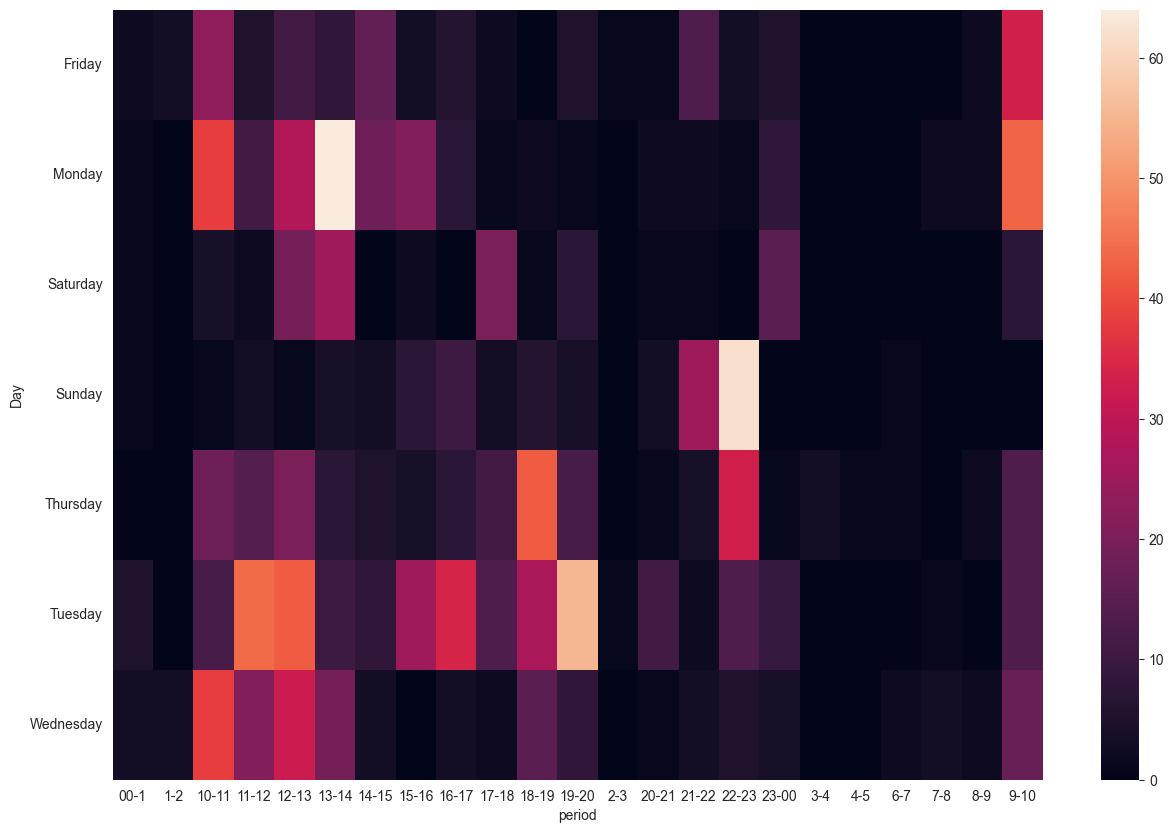

In [288]:
plt.figure(figsize=(15,10))
sns.heatmap(pivot_df)
plt.yticks(rotation='horizontal')
plt.show()
